# Kth Nearest Neighbors

In [1]:
import pandas as pd  # dataframe
import matplotlib.pyplot as plt #represtation

In [2]:
dataset = pd.read_csv("Income.csv")
dataset.head()

,Age,Income,Student,Credit,effect
0,<30,high,no,fair,negative
1,<=30,high,no,excellent,negative
2,31-40,high,no,fair,positive
3,>40,medium,no,fair,positive
4,<=30,high,no,fair,negative


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Age      9 non-null      object
 1   Income   9 non-null      object
 2   Student  9 non-null      object
 3   Credit   9 non-null      object
 4   effect   9 non-null      object
dtypes: object(5)
memory usage: 488.0+ bytes


In [4]:
X = dataset.drop(['effect'], axis = 'columns')
Y = dataset['effect']

# Labeling Data

In [5]:
from sklearn.preprocessing import LabelEncoder #Labeling string with number

In [6]:
new_age = LabelEncoder()
new_Income = LabelEncoder()
new_Student = LabelEncoder()
new_Credit = LabelEncoder()
new_d = LabelEncoder()

In [7]:
X['age_n'] = new_age.fit_transform(X['Age'])
X['Income_n'] = new_Income.fit_transform(X['Income'])
X['Student_n'] = new_Student.fit_transform(X['Student'])
X['Credit_n'] = new_Credit.fit_transform(X['Credit'])
Y = new_d.fit_transform(Y)
X.head()

,Age,Income,Student,Credit,age_n,Income_n,Student_n,Credit_n
0,<30,high,no,fair,1,0,0,1
1,<=30,high,no,excellent,2,0,0,0
2,31-40,high,no,fair,0,0,0,1
3,>40,medium,no,fair,3,2,0,1
4,<=30,high,no,fair,2,0,0,1


In [8]:
X = X.drop(['Age','Income','Student','Credit'], axis = 'columns')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size = .25, random_state = 5)

# Training and Testing

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
KNN = KNeighborsClassifier()

In [13]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
Y_pred = KNN.predict(X_test)

# Classification Accuracy Report

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print('Calssification',classification_report(Y_test,Y_pred))

Calssification               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/home/darkzero/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Accuracy with different value of K

In [17]:
train_accuracy = []
test_accuracy = []

In [18]:
for k in range(5): 
    KNN = KNeighborsClassifier(n_neighbors=k+1)
    KNN.fit(X_train, Y_train)
    train_accuracy.append(KNN.score(X_train, Y_train))
    test_accuracy.append(KNN.score(X_test, Y_test))

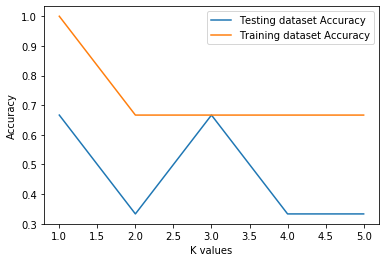

In [19]:
plt.plot([1,2,3,4,5], test_accuracy, label = 'Testing dataset Accuracy')
plt.plot([1,2,3,4,5], train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.show()